# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

import re
import random
import nltk
nltk.download("words")
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
from nltk.tokenize import word_tokenize
from collections import Counter
nltk.download('punkt')


# notebook configurations
pd.options.display.max_colwidth = 1000

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("drive/MyDrive/COGS 109 Amazon Project/Data/amazon_products_sampled_cleaned.csv")

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Mounted at /content/drive


## Dataset Inforamtion

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77181 entries, 0 to 77180
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           77181 non-null  object
 1   main_category  77181 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [3]:
df.describe().T

count unique  \
name           77181  74177   
main_category  77181     20   

                                                                              top  \
name           world wear footwear men combo multicolor sport sneaker run shoe uk   
main_category                                                      men's clothing   

               freq  
name             77  
main_category  4500

## Data Exploration

In [4]:
df.columns

Index(['name', 'main_category'], dtype='object')

In [5]:
df["main_category"].value_counts()

men's clothing             4500
sports & fitness           4500
bags & luggage             4500
beauty & health            4500
car & motorbike            4500
women's clothing           4500
home & kitchen             4500
toys & baby products       4500
kids' fashion              4500
appliances                 4500
men's shoes                4500
stores                     4500
tv, audio & cameras        4499
accessories                4499
women's shoes              4499
industrial supplies        3849
grocery & gourmet foods    3196
pet supplies               1549
music                      1066
home, kitchen, pets          24
Name: main_category, dtype: int64

Right off the bat we see that there are two columns that are a couple of columns that are very similar which are:

- ```home, kitchen, pets```
- ```home & kitchen```
- ```pet supplies```

As such, let's inspect the code and see if there's a relationship.

In [6]:
df[df["main_category"].isin(["home & kitchen", "home, kitchen, pets"])]

name  \
25695         blue dahlia kaleidovibe premium pure cotton print double bedsheet pillowcase oeko tex certify ki   
25696                           rouge tc cotton single bedsheet pillow cover bedsheet size inch inch cm cm pil   
25697  yuvi fashion point stainless steel vegetable friuts slicer cutter potato chip maker handle home kitchen   
25698                                 unicorn lifestyle lexus fabric dark grey sofa set delivery condition diy   
25699                vg hookah gel tube herbal freeze brain flavour get complementary american phunnel chillam   
...                                                                                                        ...   
30214                                                        renew usha heavy weight iron heavy weigt kg white   
30215                                                                        renew usha fh ct fan heater black   
30216                                  crompton renew aura prime antidust ceiling fan titanium effect standard   
30217          usha renew striker platinum watt goodbye dust ceiling fan anti dust feature deep metallic brown   
30218                                                         usha renew aerostyle watt ceiling fan rich brown   

             main_category  
25695       home & kitchen  
25696       home & kitchen  
25697       home & kitchen  
25698       home & kitchen  
25699       home & kitchen  
...                    ...  
30214  home, kitchen, pets  
30215  home, kitchen, pets  
30216  home, kitchen, pets  
30217  home, kitchen, pets  
30218  home, kitchen, pets  

[4524 rows x 2 columns]

From above, we see that ```home, kitchen, pets``` is really similar to ```home & kitchen```.

In [7]:
df[df["main_category"] == "home, kitchen, pets"]

name  \
30195                                                    renew inalsa handy steam watt garment steamer white purple   
30196                                                  renew usha cook joy watt glass induction cooktop touch black   
30197                                                   usha renew colossus rust free aluminium blade wall fan blue   
30198                  renew hul pureit advance pro mineral ro uv stage wall mount counter top black water purifier   
30199                                    renew morphy richards salvo storage litre vertical water heater white star   
30200                                            renew microtek digital display voltage stabilizer grey ac upto ton   
30201                                                                       renew usha fh ptc watt fan heater black   
30202                                                                 renew morphy richards litre rice cooker white   
30203                          renew impact honeywell high resolution bullet cctv camera ahd outdoor camera lens ir   
30204                                                    renew crompton greave drift air plus exhaust fan mm silver   
30205                                                                  renew havells feasto slice pop toaster black   
30206  renew hamilton beach metal slice wide slot toaster bagel defrost setting bun warmer shade selector toast boo   
30207                                                       usha renew racer ultra high speed ceiling fan white reg   
30208                                                 renew havells glanzo garment steamer watt blue grey glanzo cr   
30209                                        renew morphy richards quente instant litre vertical water heater white   
30210                   renew crompton solarium qube storage water heater installation pipe white black swh solariu   
30211                                          usha renew bloom daffodil goodbye dust ceiling fan sparkle red black   
30212                                                                       renew usha mist air icy wall fan remote   
30213                                    renew hul pureit copper mineral ro uv mf litre water purifier black copper   
30214                                                             renew usha heavy weight iron heavy weigt kg white   
30215                                                                             renew usha fh ct fan heater black   
30216                                       crompton renew aura prime antidust ceiling fan titanium effect standard   
30217               usha renew striker platinum watt goodbye dust ceiling fan anti dust feature deep metallic brown   
30218                                                              usha renew aerostyle watt ceiling fan rich brown   

             main_category  
30195  home, kitchen, pets  
30196  home, kitchen, pets  
30197  home, kitchen, pets  
30198  home, kitchen, pets  
30199  home, kitchen, pets  
30200  home, kitchen, pets  
30201  home, kitchen, pets  
30202  home, kitchen, pets  
30203  home, kitchen, pets  
30204  home, kitchen, pets  
30205  home, kitchen, pets  
30206  home, kitchen, pets  
30207  home, kitchen, pets  
30208  home, kitchen, pets  
30209  home, kitchen, pets  
30210  home, kitchen, pets  
30211  home, kitchen, pets  
30212  home, kitchen, pets  
30213  home, kitchen, pets  
30214  home, kitchen, pets  
30215  home, kitchen, pets  
30216  home, kitchen, pets  
30217  home, kitchen, pets  
30218  home, kitchen, pets

In [8]:
df[df["main_category"] == "pet supplies"]

name  \
48634                                            meat chicken flavour real chicken dog biscuit life stage buy get free   
48635                                                                            purepet ocean fish adult dry cat food   
48636                                                                           purepet mackerel adult dry cat food kg   
48637                                                                  drool chicken egg adult dry dog food kg free kg   
48638                                                      pedigree adult dry dog food chicken vegetables flavour pack   
...                                                                                                                ...   
50178  ruse pet big brother print dog round neck sleeveless vest tank shirt tee apparel clothes tee gift dog steel blu   
50179   kutkut newest bungee style retractable high elastic luminous anti wind per double head traction rope one dreag   
50180                      sr vision white twisted chew stick dog cat kitten puppy fish white twist chew stick pack kg   
50181                             stylish keychain dog lover dog keychain girl boy multi color pet animal keyring pack   
50182                            furry tail multistar chew tablet vitamins amino acid heathy active playful pet tablet   

      main_category  
48634  pet supplies  
48635  pet supplies  
48636  pet supplies  
48637  pet supplies  
48638  pet supplies  
...             ...  
50178  pet supplies  
50179  pet supplies  
50180  pet supplies  
50181  pet supplies  
50182  pet supplies  

[1549 rows x 2 columns]

In [9]:
#as you can see, there are no pet key words in the df for this column with 'pets' in the name
df[df['main_category'] ==  'home, kitchen, pets']

# Filter the DataFrame for rows where main_category is "pet supplies"
filtered_df = df[df['main_category'] == 'pet supplies']

# Combine all the "name" values into a single string
text = ' '.join(filtered_df['name'])

# Tokenize the text into words
tokens = word_tokenize(text)

filtered_tokens = [token for token in tokens if token.lower() not in stopwords]

# Count the frequency of each word
word_freq = Counter(filtered_tokens)

# Get the top 10 most common words
top_words = word_freq.most_common(10)

# Print the top words
for word, freq in top_words:
    print(f'{word}: {freq}')

dog: 1560
pet: 635
cat: 384
puppy: 299
toy: 244
food: 227
pack: 223
chicken: 201
small: 187
treat: 178


In [10]:
# Filter the DataFrame for the two categories
filtered_df = df[df['main_category'] == 'home, kitchen, pets']
# Search for specific keywords in the 'name' column
pet_list = ['dog', 'pet', 'cat', 'puppy', 'toy', 'chicken', 'treat']
matching_rows = filtered_df[filtered_df['name'].str.contains('|'.join(pet_list))]

In [11]:
df["main_category"] = df["main_category"].replace('home, kitchen, pets', 'home & kitchen')

#no more 'home,kitchen, pets'! just one -> 'home & kitchen'
df["main_category"].value_counts()

home & kitchen             4524
men's clothing             4500
sports & fitness           4500
bags & luggage             4500
beauty & health            4500
car & motorbike            4500
women's clothing           4500
kids' fashion              4500
appliances                 4500
men's shoes                4500
toys & baby products       4500
stores                     4500
tv, audio & cameras        4499
accessories                4499
women's shoes              4499
industrial supplies        3849
grocery & gourmet foods    3196
pet supplies               1549
music                      1066
Name: main_category, dtype: int64

In [12]:

# Compare the counts of matching rows for each category
comparison = matching_rows['main_category'].value_counts()

print(comparison)
print(matching_rows)

Series([], Name: main_category, dtype: int64)
Empty DataFrame
Columns: [name, main_category]
Index: []


## Data Visualization

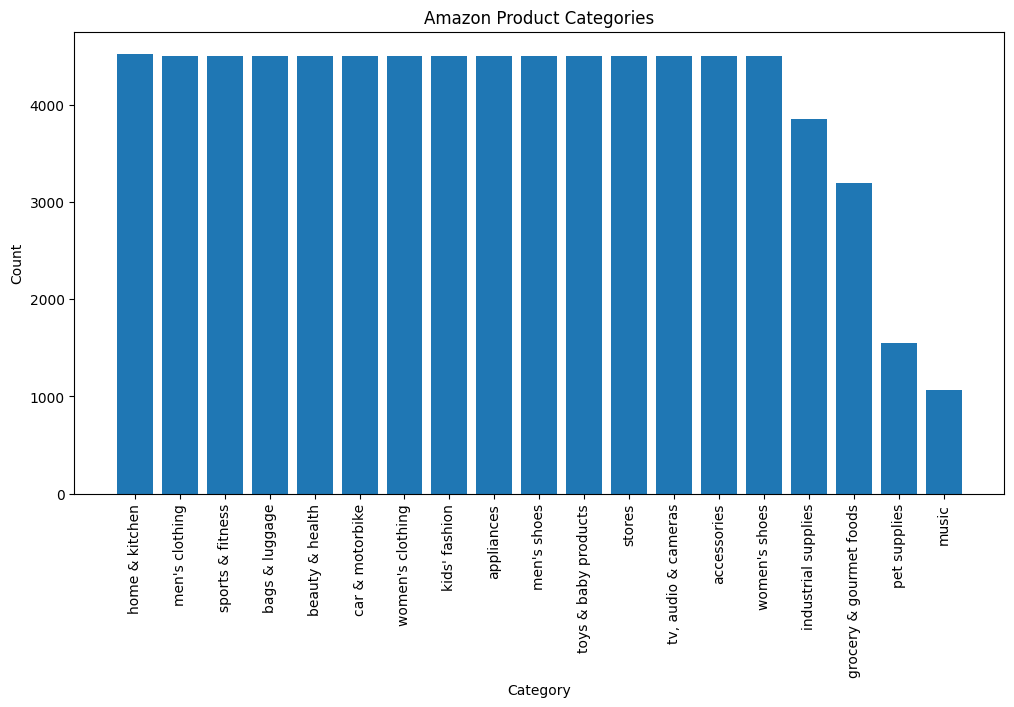

In [13]:
# Bar chart
plt.figure(figsize=(12, 6))
plt.bar(df['main_category'].value_counts().index, df['main_category'].value_counts().values)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Amazon Product Categories")
plt.xticks(rotation=90)

plt.show()

In [14]:
words = df["name"].str.split().explode()
words

0        belwaba
0          small
0         fabric
0          sling
0            bag
          ...   
77179          m
77180      metro
77180      woman
77180    fashion
77180     sandal
Name: name, Length: 855213, dtype: object

In [15]:
filtered_words = words[words.str.len() <= 2]

max_2_letters_df = pd.DataFrame({"word": filtered_words.unique()})
max_2_letters_df

word
0     pu
1     bi
2     dk
3     mm
4     le
..   ...
607   vb
608   bq
609   kj
610   iw
611   wx

[612 rows x 1 columns]

In [16]:
words[words.str.len() == 5].unique()

array(['small', 'sling', 'woman', ..., 'drown', 'blate', 'cuoio'],
      dtype=object)

In [17]:
words[words.str.len() <= 2].unique()

array(['pu', 'bi', 'dk', 'mm', 'le', 'gm', 'pc', 'bh', 'cm', 'pp', 'aa',
       'dc', 'kg', 'id', 'wo', 'rm', 'pn', 'sj', 'ki', 'uv', 'ab', 'ri',
       'dm', 'fr', 'st', 'cl', 'ft', 'om', 'op', 'pr', 'sf', 'mr', 'cz',
       'ce', 'mt', 'si', 's', 'sr', 'fo', 'bm', 'ca', 'ji', 'di', 'go',
       'la', 'lc', 'nm', 'pe', 'rk', 'ii', 'kt', 'ar', 'ug', 'ad', 'jg',
       'bl', 'kd', 'mj', 'av', 'cf', 'sa', 'el', 'er', 'p', 'ee', 'ek',
       'hv', 'wi', 'mk', 'au', 'ml', 'kc', 'ro', 'jd', 'br', 'ch', 'dx',
       'ha', 'iv', 'hj', 'ig', 'nk', 'hm', 'co', 'po', 'ra', 'ct', 'ge',
       'r', 'az', 'ea', 'j', 'gx', 'od', 'lr', 'se', 'nr', 'wa', 'wt',
       'th', 'sk', 'hi', 'lo', 'uk', 'tr', 'ev', 'es', 'de', 'be', 'gy',
       'nh', 't', 'gi', 'dn', 'oz', 'kb', 'vi', 'bo', 'gw', 'tb', 'hk',
       'yo', 'ta', 'sp', 'gl', 'jn', 'u', 'n', 'uc', 'lt', 'gb', 'al',
       'fc', 'fb', 'pi', 'pm', 're', 'sb', 'ck', 'rc', 'wh', 'pw', 'bt',
       'bj', 'ff', 'us', 'ps', 'wc', 'db', 'rg', 'np', 'gt

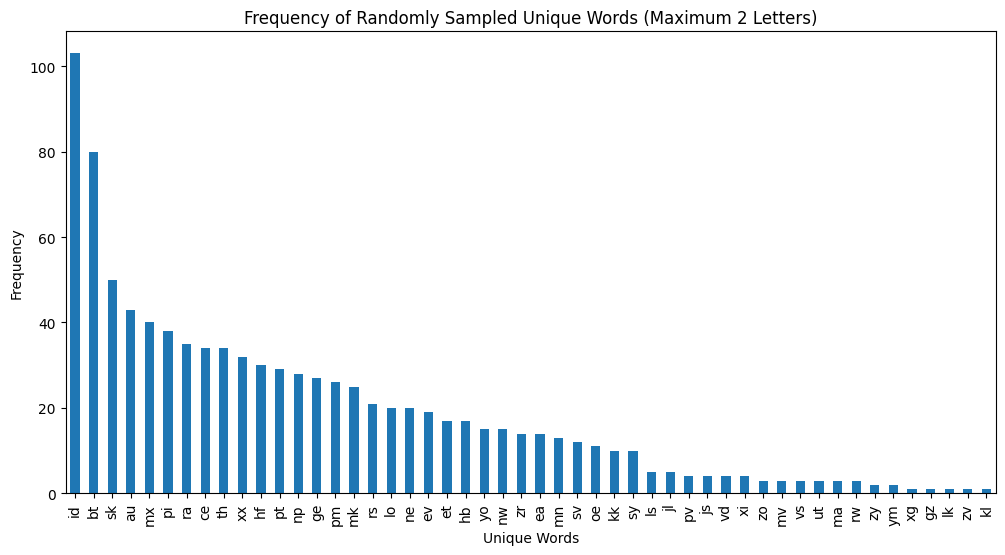

In [18]:
words = words[words.str.len() <= 2]
sample_words = random.sample(words.unique().tolist(), 50)
word_counts = words[words.isin(sample_words)].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
word_counts.plot(kind="bar")
plt.xlabel("Unique Words")
plt.ylabel("Frequency")
plt.title("Frequency of Randomly Sampled Unique Words (Maximum 2 Letters)")
plt.xticks(rotation=90)
plt.show()

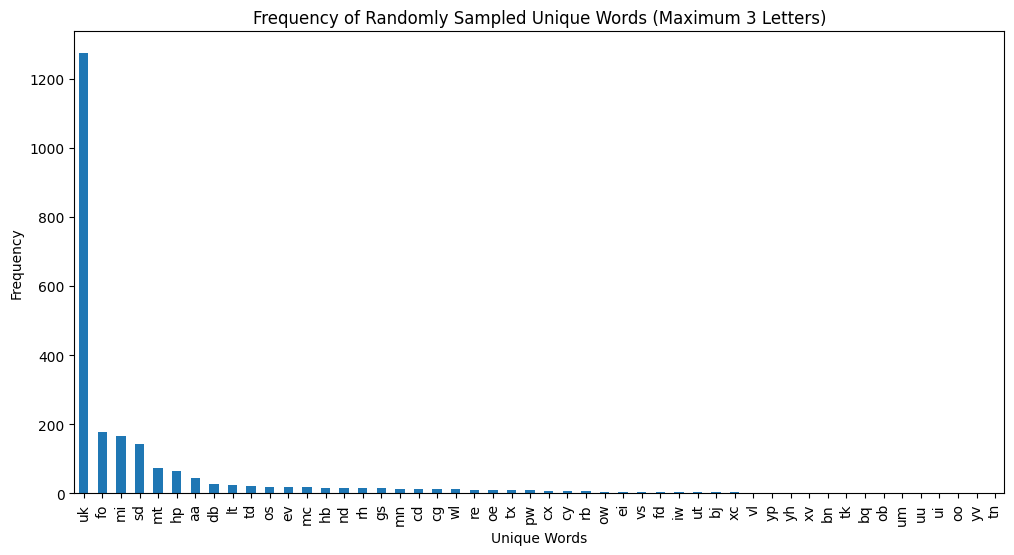

In [19]:
words = words[words.str.len() <= 3]
sample_words = random.sample(words.unique().tolist(), 50)
word_counts = words[words.isin(sample_words)].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
word_counts.plot(kind="bar")
plt.xlabel("Unique Words")
plt.ylabel("Frequency")
plt.title("Frequency of Randomly Sampled Unique Words (Maximum 3 Letters)")
plt.xticks(rotation=90)
plt.show()

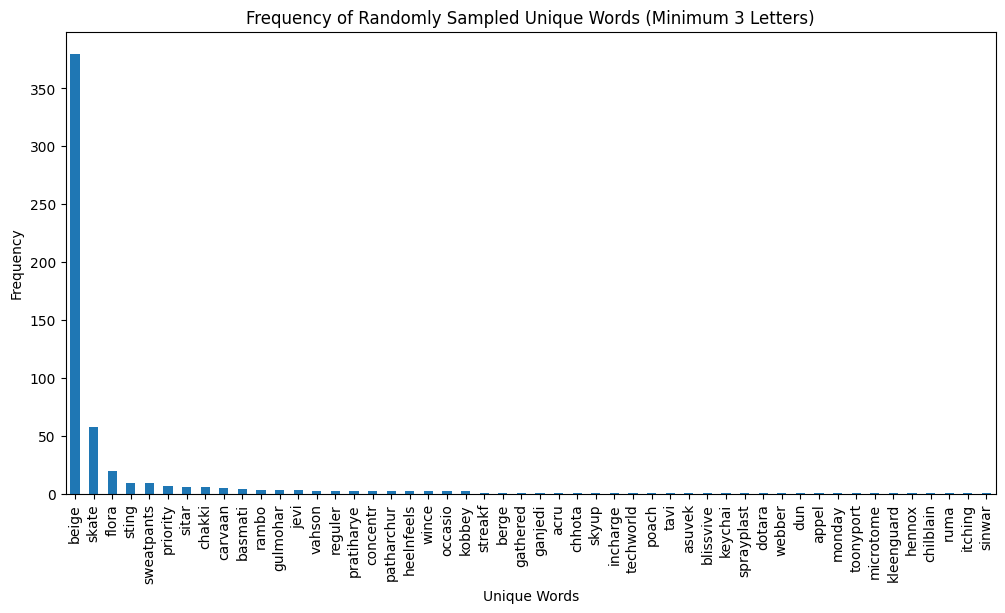

In [20]:
words = df["name"].str.split().explode()
words = words[words.str.len() >= 3]
sample_words = random.sample(words.unique().tolist(), 50)
word_counts = words[words.isin(sample_words)].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
word_counts.plot(kind="bar")
plt.xlabel("Unique Words")
plt.ylabel("Frequency")
plt.title("Frequency of Randomly Sampled Unique Words (Minimum 3 Letters)")
plt.xticks(rotation=90)
plt.show()

aaa        61
iii        50
xxxl       27
xxx         7
xxxxl       3
xxxx        2
eee         2
aaaaa       2
ccctv       2
xxxg        1
cccc        1
ccccp       1
iiii        1
iiin        1
aaayega     1
sss         1
lll         1
xxxxx       1
eeezeee     1
Name: name, dtype: int64


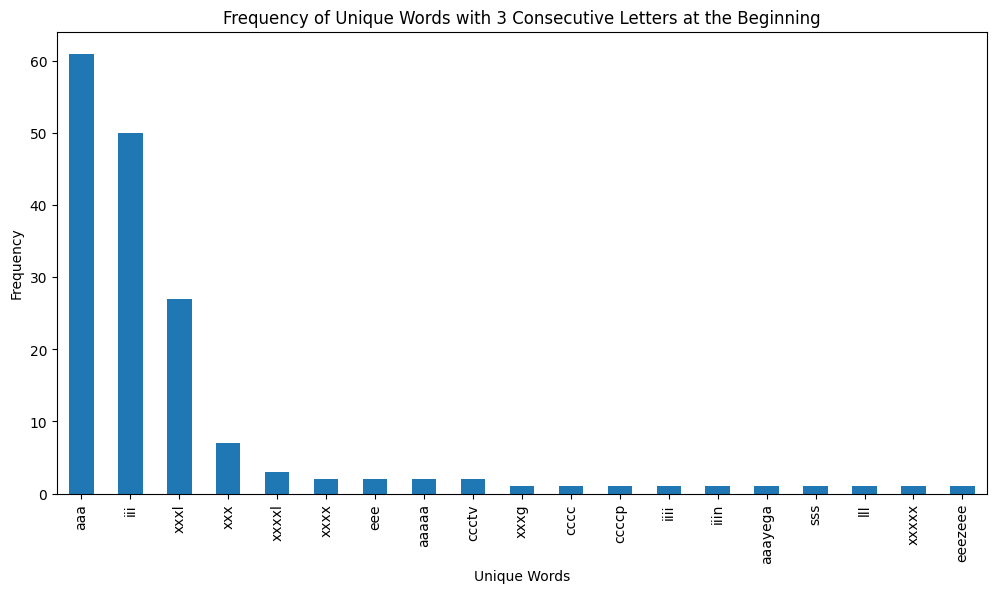

In [21]:
pattern = r"^(.)\1{2}"
filtered_words = words[words.str.len() >= 3]
matching_words = filtered_words[filtered_words.str.match(pattern)]
word_counts = matching_words.value_counts()
print(word_counts)

# Plot the bar chart
plt.figure(figsize=(12, 6))
word_counts.plot(kind="bar")
plt.xlabel("Unique Words")
plt.ylabel("Frequency")
plt.title("Frequency of Unique Words with 3 Consecutive Letters at the Beginning")
plt.xticks(rotation=90)
plt.show()

In [22]:
words = df["name"].str.split().explode()
filtered_words = words[words.str.len() <= 3]

max_3_letters_df = pd.DataFrame({"word": filtered_words.unique()})
max_3_letters_df

word
0     bag
1     gem
2     men
3     tan
4     lxe
...   ...
3700  lcf
3701  pwr
3702  lpw
3703  mmj
3704  shu

[3705 rows x 1 columns]

### Remove 2 letter words:

In [23]:
def remove_two_letter_words(sentence):
    words = sentence.split()
    filtered_words = [word for word in words if len(word) > 2]
    return ' '.join(filtered_words)

df['name'] = df['name'].apply(remove_two_letter_words)

# check
words = df["name"].str.split().explode()
words[words.str.len() <= 2].unique()

array([], dtype=object)

Given that we include all words in the English alpahabet, regardless of whether its inherently an English word or not, isn't the purpose of this project. As such, the code below, removes words that don't follow the standard English convention.

### Remove 3 Consecutive consonants

In [24]:
import re

def remove_words_with_consecutive_consonants(product_name):
    words = product_name.split()
    cleaned_words = [word for word in words if not re.search(r'[bcdfghjklmnpqrstvwxyz]{3}', word, re.IGNORECASE)]
    cleaned_product_name = " ".join(cleaned_words)
    return cleaned_product_name

df["name"] = df["name"].apply(remove_words_with_consecutive_consonants)

### Remove words with no vowels and y

In [25]:
from nltk.corpus import words
english_words = set(words.words())

def remove_words_no_vowels_or_y(sentence):
    cleaned_sentence = " ".join(w for w in nltk.wordpunct_tokenize(sentence) if any(c.lower() in 'aeiouy' for c in w.lower()) or not w.isalpha())
    return cleaned_sentence

df["name"] = df["name"].apply(remove_words_no_vowels_or_y)

In [26]:
df["name"]

0                              belwaba small fabric sling bag side bag woman
1                      wesley liter casual daypack collegedaypack tuitionbag
2        prajapati gem certify unheated ratti carat natural ruby loose woman
3                     side sling cross body messenger bag men small size tan
4                                                    baggit lxe pheeby black
                                        ...                                 
77176                                                  grey block heel woman
77177                                              london womens ballet flat
77178                                                   bata woman mary heel
77179                                     denim expos traditional size white
77180                                             metro woman fashion sandal
Name: name, Length: 77181, dtype: object

### 3 Consecutive letters

In [27]:
import re

def remove_words_with_consecutive_letters(word):
    pattern = r"(\w)\1{2,}"  # Matches any character (\w) followed by itself (\1) repeated two or more times ({2,})
    return re.sub(pattern, "", word)

# Apply the function to the "name" column
df["name"] = df["name"].apply(remove_words_with_consecutive_letters)

In [28]:
pattern = r"(\w)\1{2,}"
matching_words = df["name"].str.contains(pattern)
if not matching_words.any():
    print("Success! All words with the same 3 consecutive letters at the beginning have been removed.")
else:
    print("Try again.")

Success! All words with the same 3 consecutive letters at the beginning have been removed.


### Removes words with same letters

In [29]:
def remove_words_with_same_letters(product_name):
    words = product_name.split()
    cleaned_words = [word for word in words if not re.match(r"^(.)\1{2}", word)]
    cleaned_product_name = " ".join(cleaned_words)
    return cleaned_product_name

df["name"] = df["name"].apply(remove_words_with_same_letters)

In [30]:
df[df["name"].str.contains(pattern)]

Empty DataFrame
Columns: [name, main_category]
Index: []

### Remove Null or Empty Rows

In [31]:
name_null_or_empty_rows = df[df["name"].isnull() | (df["name"] == "")]
name_null_or_empty_rows

name            main_category
10206                bags & luggage
11068                bags & luggage
11754                bags & luggage
11909                bags & luggage
12327                bags & luggage
17198               beauty & health
23044       grocery & gourmet foods
23061       grocery & gourmet foods
24205       grocery & gourmet foods
24234       grocery & gourmet foods
27968                home & kitchen
32451           industrial supplies
33719           industrial supplies
35000                 kids' fashion
36882                 kids' fashion
37904                 kids' fashion
38186                 kids' fashion
41882                men's clothing
42011                men's clothing
51708              sports & fitness
53477              sports & fitness
55254                        stores
59169                        stores
70456              women's clothing
76268                 women's shoes
76276                 women's shoes
77127                 women's shoes

In [32]:
df.drop(name_null_or_empty_rows.index, inplace=True)

In [33]:
name_null_or_empty_rows = df[df["name"].isnull() | (df["name"] == "")]
name_null_or_empty_rows

Empty DataFrame
Columns: [name, main_category]
Index: []

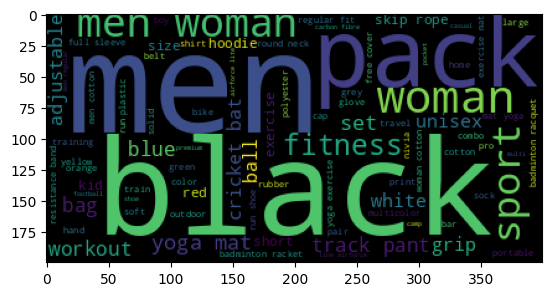

In [34]:
from wordcloud import WordCloud

# Filter the dataset for the desired category
wordcloud_df = df[df['main_category'] == 'sports & fitness']

# Extract the text data from the column of interest
text_data = wordcloud_df['name'].str.cat(sep=' ')

wc = WordCloud().generate(text_data)
plt.imshow(wc)

accessories


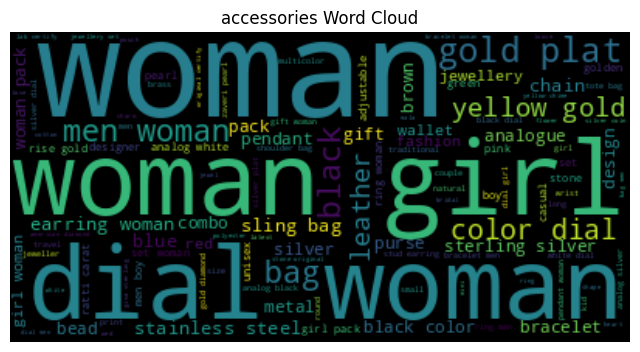

appliances


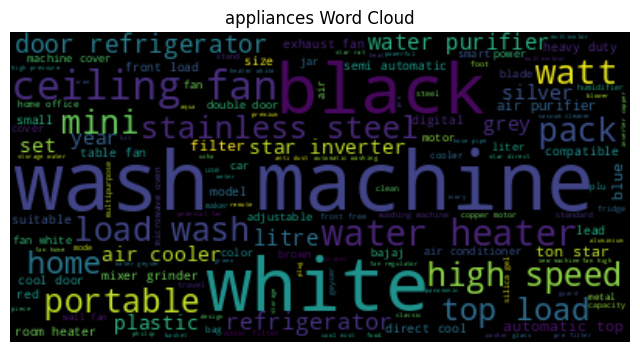

bags & luggage


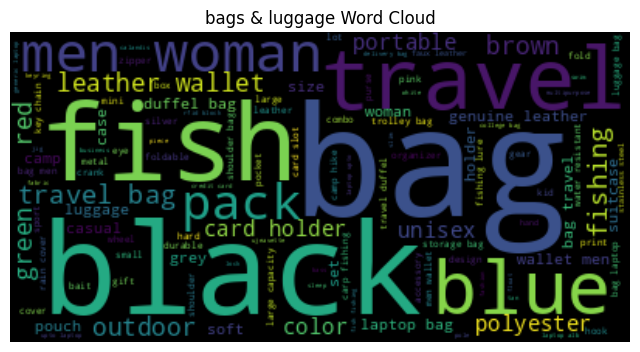

beauty & health


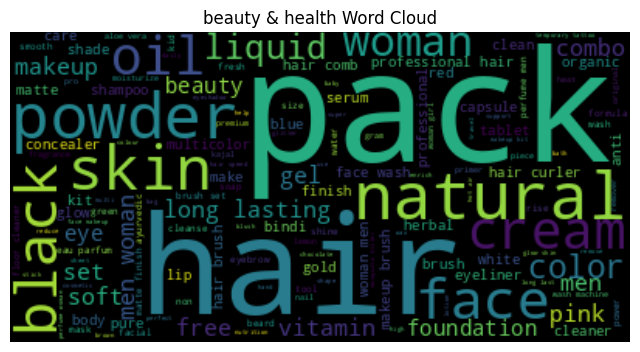

car & motorbike


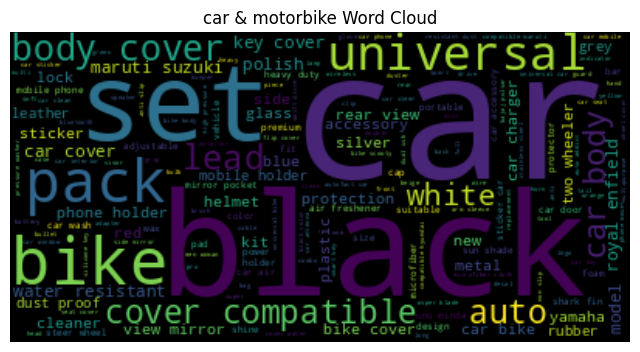

grocery & gourmet foods


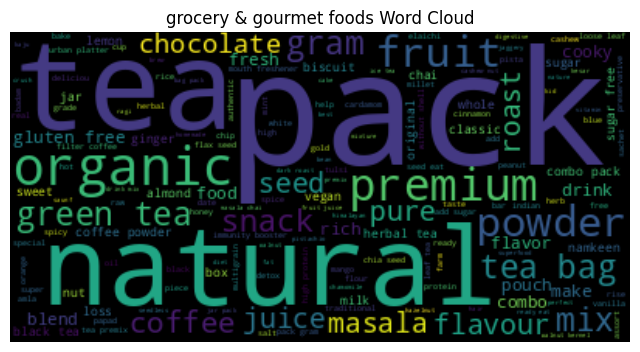

home & kitchen


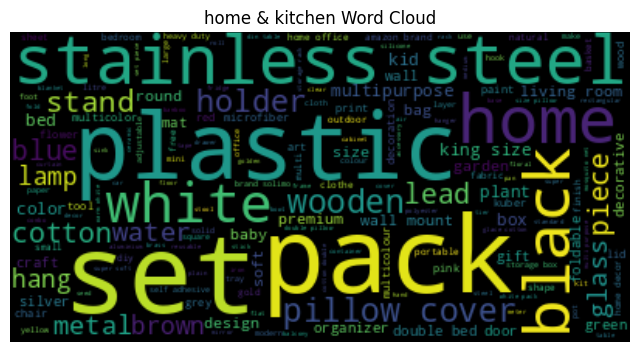

industrial supplies


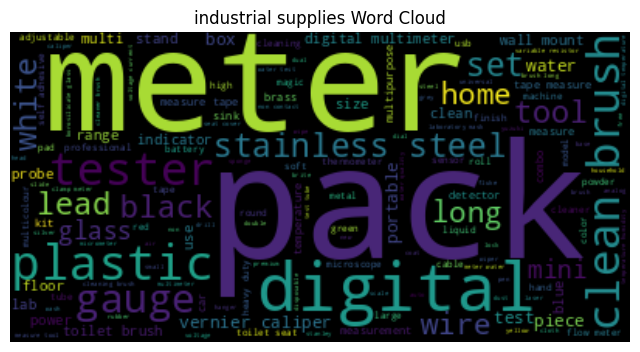

kids' fashion


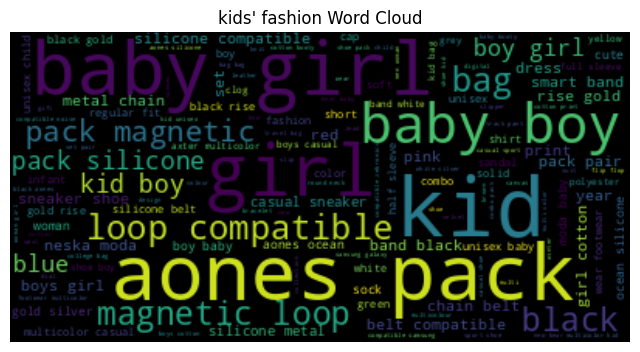

men's clothing


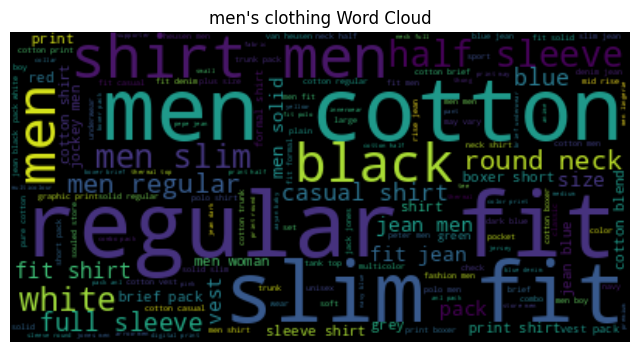

men's shoes


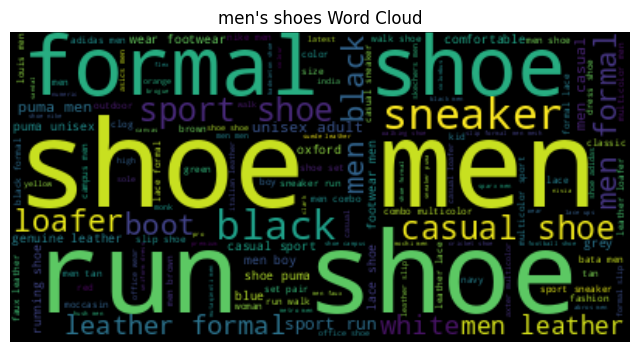

music


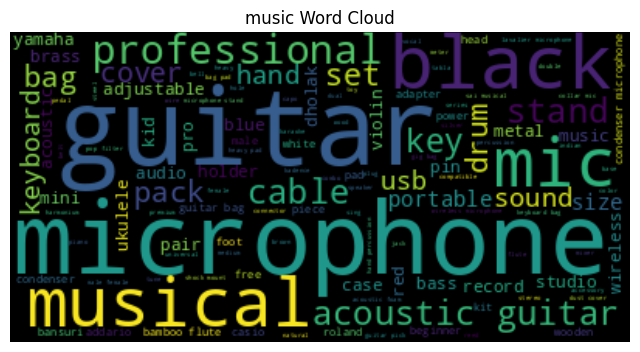

pet supplies


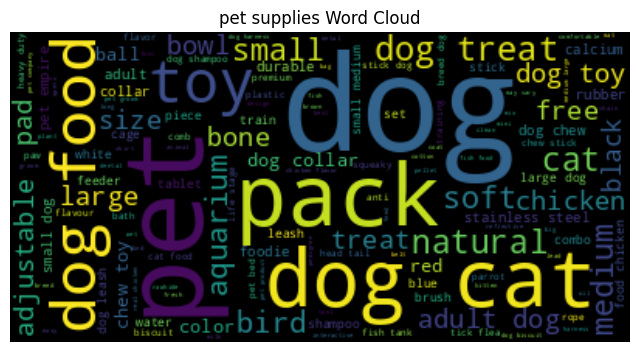

sports & fitness


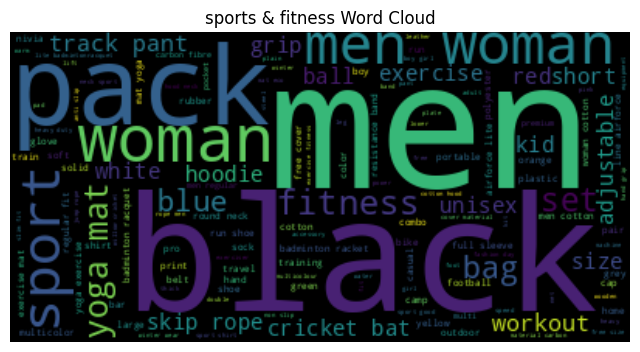

stores


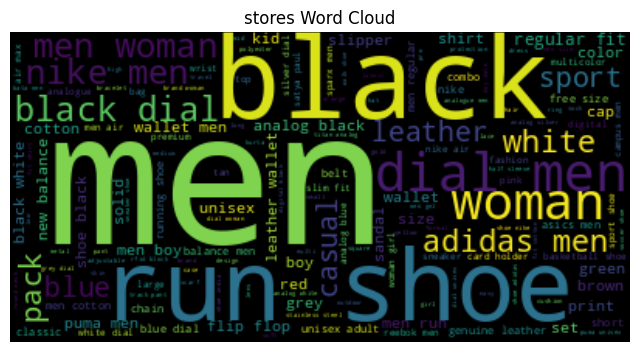

toys & baby products


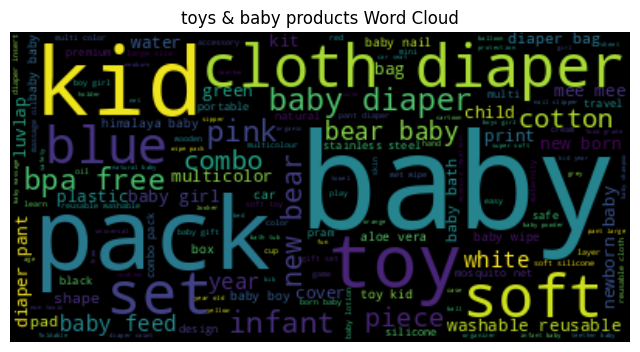

tv, audio & cameras


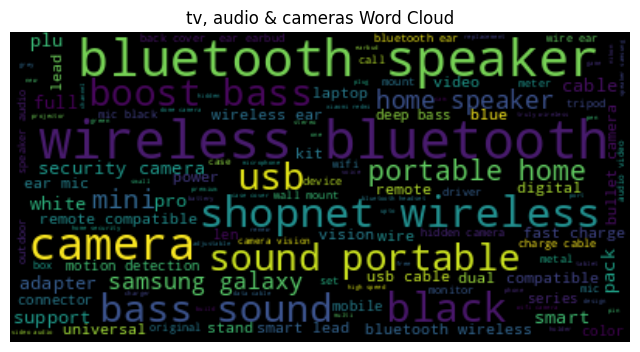

women's clothing


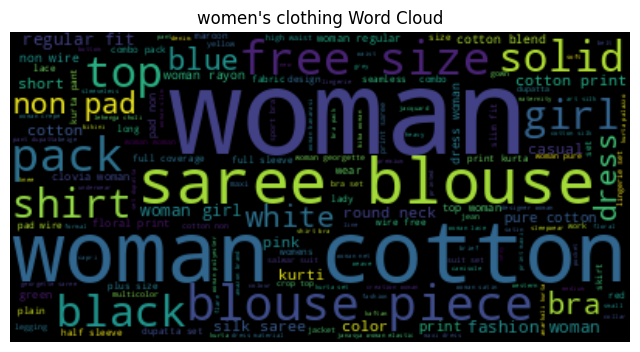

women's shoes


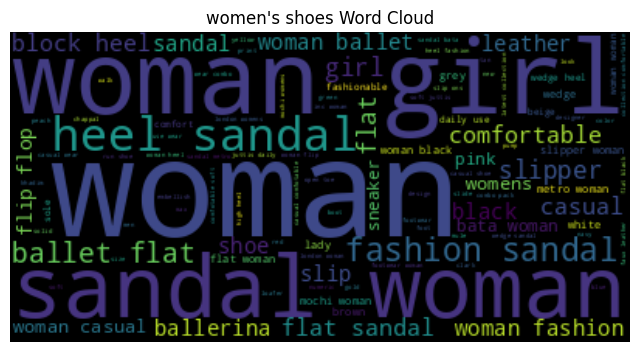

In [35]:
for category in df["main_category"].unique():
    # Filter the product names belonging to the current category
    print(category)
    category_products = df[df['main_category'] == category]['name']

    # Join the product names into a single string
    text = ' '.join(category_products)

    # Generate the word cloud
    wordcloud = WordCloud().generate(text)

    # Plot the word cloud
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(category + ' Word Cloud')
    plt.axis('off')
    plt.show()

In [36]:
df.sample(5)

name  \
17980                womens girl tya fashion mini multicolour makeup kit pink makeup brush set pack   
32949                                                 japsin tube manometer range wall mount nozzel   
53796  charge interlock knit hexagon emboss round neck sport shirt scuba size charge play interlock   
26230                                milton new tiara stainless steel hour hot cold water rise gold   
23565                                             colombian brew chocolate mocha coffee sugar vegan   

                 main_category  
17980          beauty & health  
32949      industrial supplies  
53796         sports & fitness  
26230           home & kitchen  
23565  grocery & gourmet foods

In [37]:
df.to_csv("drive/MyDrive/COGS 109 Amazon Project/Data/amazon_products_sampled_eda_cleaned.csv", index = False)
